# Customer Churn Analysis:

In [5]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')
#To print all columns and all rows
pd.set_option('display.max_columns',None)


In [6]:
#importing dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv") 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Preprocessing and EDA:


In [7]:
#Checking shape of my dataset
df.shape

(7043, 21)

In [8]:
#Checking all column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
#Checking the data types of all columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
#Converting TotalCharges from object to float type data
df["TotalCharges"]=df["TotalCharges"].str.strip()
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])

In [11]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
#Checking unique values of each column
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [13]:
#Droping customer ID column
df = df.drop(["customerID"],axis=1)

In [14]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

Male      3555
Female    3488
Name: gender, dtype: int64
****************************************
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
****************************************
No     3641
Yes    3402
Name: Partner, dtype: int64
****************************************
No     4933
Yes    2110
Name: Dependents, dtype: int64
****************************************
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
****************************************
Yes    6361
No      682
Name: PhoneService, dtype: int64
****************************************
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
****************************************
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
****************************************
No                     3498
Yes            

Above are the value counts of each column and i can see some duplicate entries in MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies.So i ahve to replace them.

I have replaced with No for No internet Service.If no internet service then there is no MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies.So i will replace all these entries with 'No'.

In [15]:
#Grouping entries of MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies column

#Grouping in MultipleLines column
df["MultipleLines"].replace("No phone service","No",inplace=True)

#Grouping in OnlineSecurity column
df["OnlineSecurity"].replace("No internet service","No",inplace=True)

#Grouping in OnlineBackup column
df["OnlineBackup"].replace("No internet service","No",inplace=True)

#Grouping in DeviceProtection column
df["DeviceProtection"].replace("No internet service","No",inplace=True)

#Grouping in TechSupport column
df["TechSupport"].replace("No internet service","No",inplace=True)

#Grouping in StreamingTV column
df["StreamingTV"].replace("No internet service","No",inplace=True)

#Grouping in StreamingMovies column
df["StreamingMovies"].replace("No internet service","No",inplace=True)

In [16]:
#Checking null values in the dataset
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
#Replacing nan values of TotalCharges column with it's mean
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [18]:
#Checking nan values agian
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
#Checking unique values of target column
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
#Checking for empty observations
df.loc[df['Churn'] == " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [21]:
#Checking description of data set
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Visualization:
Univariate Analysis:

In [22]:

# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [23]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


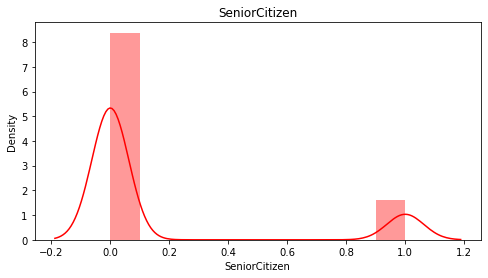

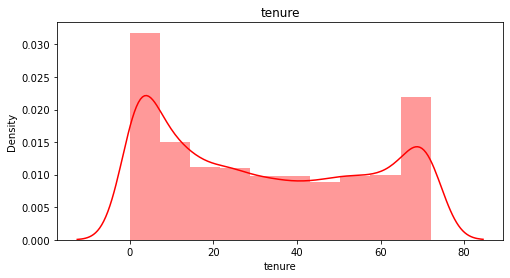

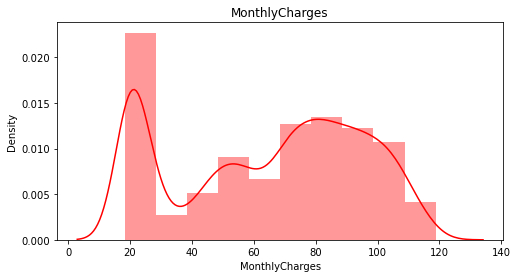

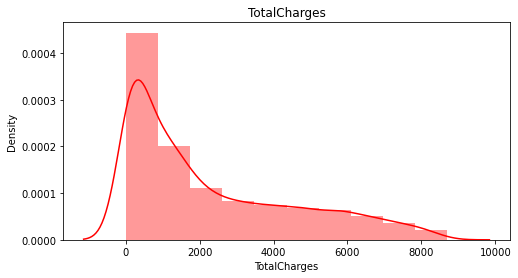

In [24]:
#Univariate analysis for numerical columns:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="r")
    plt.title(i)
    plt.show()

In [25]:
#Univariate Analysis for categorical columns:
#Checking the value counts of gender column
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [26]:
#Checking the value counts of Partner column
df.Partner.value_counts()


No     3641
Yes    3402
Name: Partner, dtype: int64

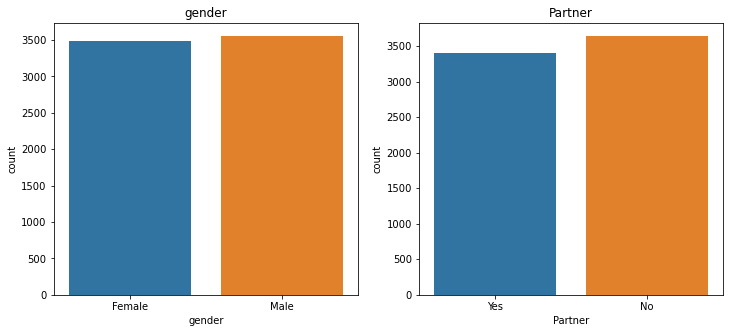

In [27]:
#Count plot for gender and Partner
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('gender')
sns.countplot(df['gender'])
plt.subplot(1, 2, 2)
plt.title('Partner')
sns.countplot(df['Partner'])
plt.show()

In [28]:
#Checking the value counts of Dependents column
df.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

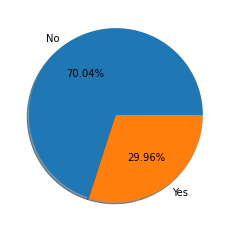

In [29]:
#Ploting pie chart for Dependents column
labels='No','Yes'
fig, ax = plt.subplots()
ax.pie(df['Dependents'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

In [30]:
#Checking the value counts of PhoneService column
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

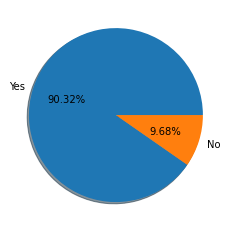

In [31]:
#Ploting pie chart for PhoneService column
labels='Yes','No'
fig, ax = plt.subplots()
ax.pie(df['PhoneService'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

In [32]:
#Checking the value counts of MultipleLines column
df.MultipleLines.value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

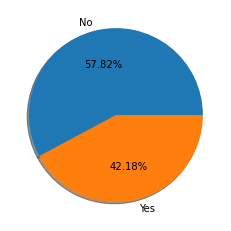

In [33]:
#Ploting pie chart for MultipleLines column
labels='No','Yes'
fig, ax = plt.subplots()
ax.pie(df['MultipleLines'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

In [34]:
#Checking the value counts of InternetService column
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

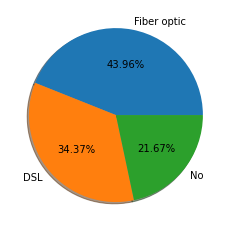

In [35]:
#Ploting pie chart for InternetService column
labels='Fiber optic','DSL','No'
fig, ax = plt.subplots()
ax.pie(df['InternetService'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

In [36]:
#Checking the value counts of OnlineSecurity column
df.OnlineSecurity.value_counts()


No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64

In [37]:
#Checking the value counts of OnlineBackup column
df.OnlineBackup.value_counts()

No     4614
Yes    2429
Name: OnlineBackup, dtype: int64

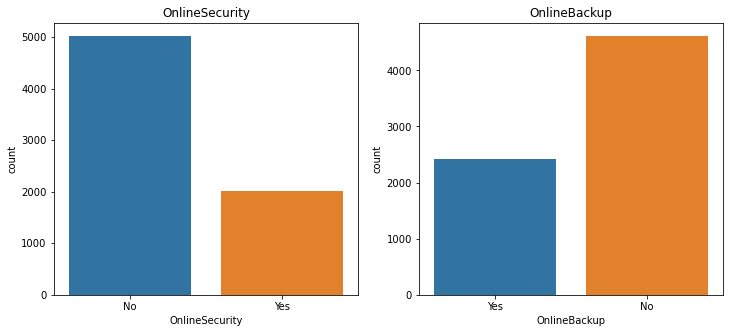

In [38]:
#Count plot for OnlineSecurity and OnlineBackup
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('OnlineSecurity')
sns.countplot(df['OnlineSecurity'])
plt.subplot(1, 2, 2)
plt.title('OnlineBackup')
sns.countplot(df['OnlineBackup'])
plt.show()

In [39]:
#Checking the value counts of DeviceProtection column
df.DeviceProtection.value_counts()

No     4621
Yes    2422
Name: DeviceProtection, dtype: int64

In [40]:
#Checking the value counts of TechSupport column
df.TechSupport.value_counts()

No     4999
Yes    2044
Name: TechSupport, dtype: int64

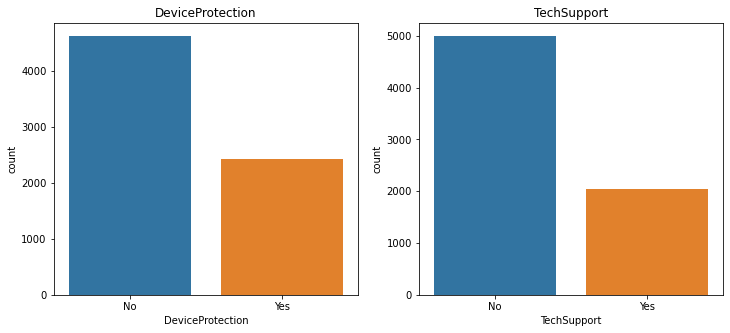

In [41]:
#Count plot for DeviceProtection and TechSupport
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('DeviceProtection')
sns.countplot(df['DeviceProtection'])
plt.subplot(1, 2, 2)
plt.title('TechSupport')
sns.countplot(df['TechSupport'])
plt.show()

In [42]:
#Checking the value counts of StreamingTV column
df.StreamingTV.value_counts()


No     4336
Yes    2707
Name: StreamingTV, dtype: int64

In [43]:
#Checking the value counts of StreamingMovies column
df.StreamingMovies.value_counts()

No     4311
Yes    2732
Name: StreamingMovies, dtype: int64

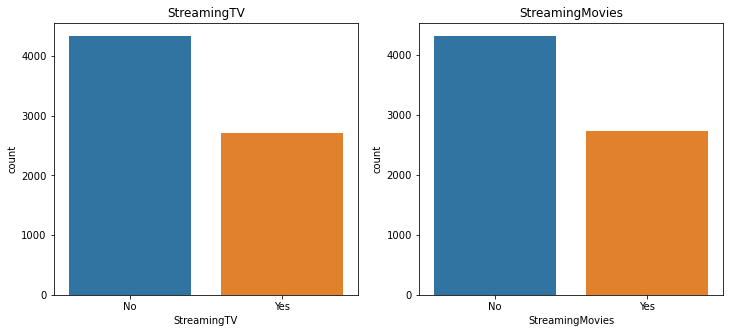

In [44]:
#Count plot for StreamingTV and StreamingMovies
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('StreamingTV')
sns.countplot(df['StreamingTV'])
plt.subplot(1, 2, 2)
plt.title('StreamingMovies')
sns.countplot(df['StreamingMovies'])
plt.show()

In [45]:
#Checking the value counts of Contract column
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

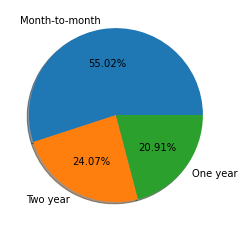

In [46]:
#Ploting pie chart for Contract column
labels='Month-to-month','Two year','One year'
fig, ax = plt.subplots()
ax.pie(df['Contract'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

In [47]:
#Checking the value counts of PaperlessBilling column
df.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

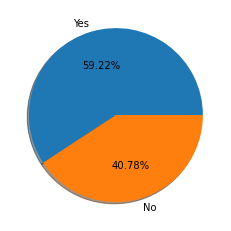

In [48]:
#Ploting pie chart for PaperlessBilling column
labels='Yes','No'
fig, ax = plt.subplots()
ax.pie(df['PaperlessBilling'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

In [49]:
#Checking the value counts of PaymentMethod column
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

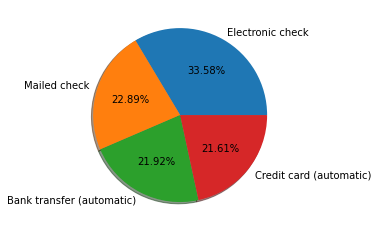

In [50]:
#Ploting pie chart for PaymentMethod column
labels='Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'
fig, ax = plt.subplots()
ax.pie(df['PaymentMethod'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

In [51]:
#Checking the value counts of Churn column
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

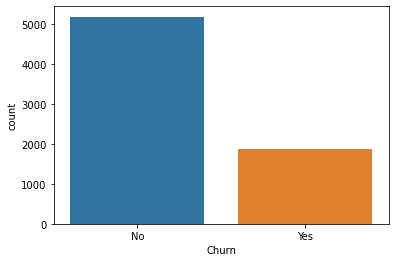

In [52]:
#Countplot for Churn column
sns.countplot(df['Churn'])

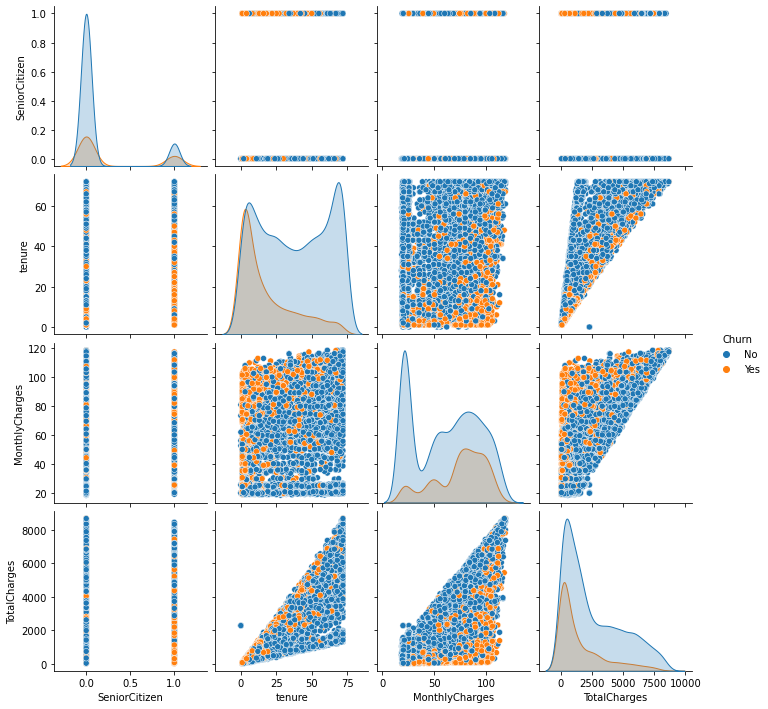

In [53]:
#Multivariate Analysis:
#pair ploting for df
sns.pairplot(df,hue="Churn")

<AxesSubplot:>

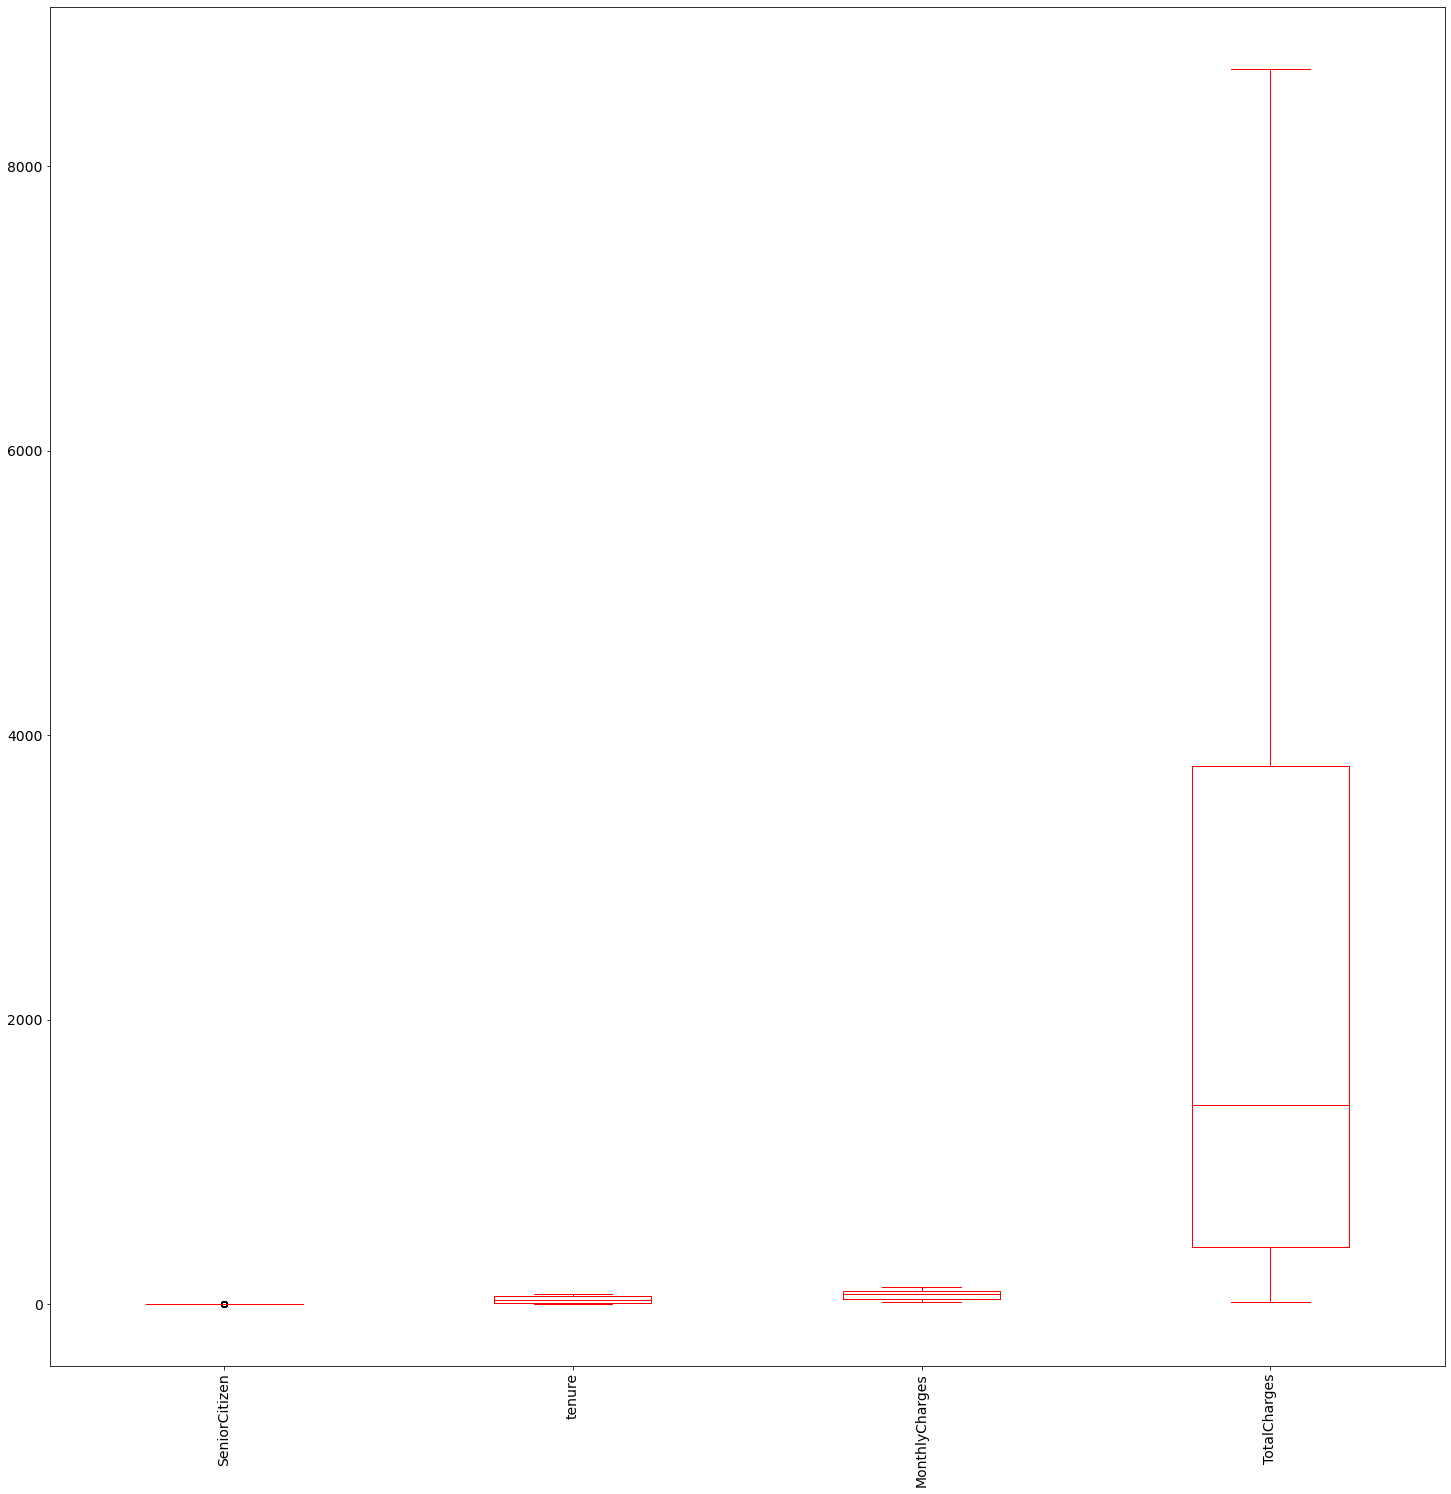

In [54]:
#Data Cleaning:

#Checking for outliers using boxplot
df.plot(rot = 90,kind='box',fontsize=14,figsize=(25,25),color='r')

In [55]:
#Checking for skewness
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

In [56]:
#Removing skewness using yeo-johnson method:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [57]:
df[['TotalCharges']] = scaler.fit_transform(df[['TotalCharges']].values)

In [58]:
#Checking skewness again
df[['TotalCharges']].skew()

TotalCharges   -0.144899
dtype: float64

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

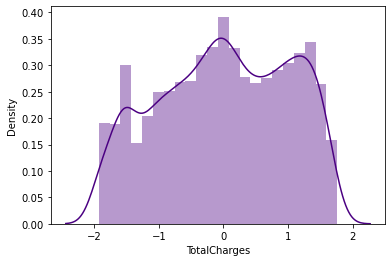

In [59]:
sns.distplot(df['TotalCharges'],color="indigo")

In [60]:
#Ordinal Encoding:
# Separating categorical columns in df
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [61]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]= OE.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,-1.810588,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,0.253313,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,-1.387269,1.0
3,1.0,0,0.0,0.0,45,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,42.30,0.232253,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,-1.250118,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,84.80,0.295688,0.0
7039,0.0,0,1.0,1.0,72,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,103.20,1.567097,0.0
7040,0.0,0,1.0,1.0,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,-0.859899,0.0
7041,1.0,1,1.0,0.0,4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,-0.922968,1.0


In [62]:
#Checking correlation using heat map:
cor=df.corr()

In [63]:
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.000863,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.000126,-0.011754,0.017352,-0.014569,-0.002691,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.032310,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.038551,0.220173,0.105478,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.000891,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,-0.154798,0.096848,0.344618,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.044590,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,-0.040292,-0.113890,0.087831,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,-0.030359,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,-0.370436,0.247900,0.865270,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.387436,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,-0.004184,0.247398,0.084371,0.011942
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.011124,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.163530,-0.171026,0.490434,0.465731,0.040102
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,0.011124,1.000000,-0.393013,-0.314737,-0.306805,-0.389382,-0.242532,-0.250343,0.099721,-0.138625,0.086140,-0.323260,-0.207654,-0.047291
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,-0.393013,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,-0.150100,0.296594,0.403935,-0.171226
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,-0.314737,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,-0.170898,0.441780,0.483612,-0.082255


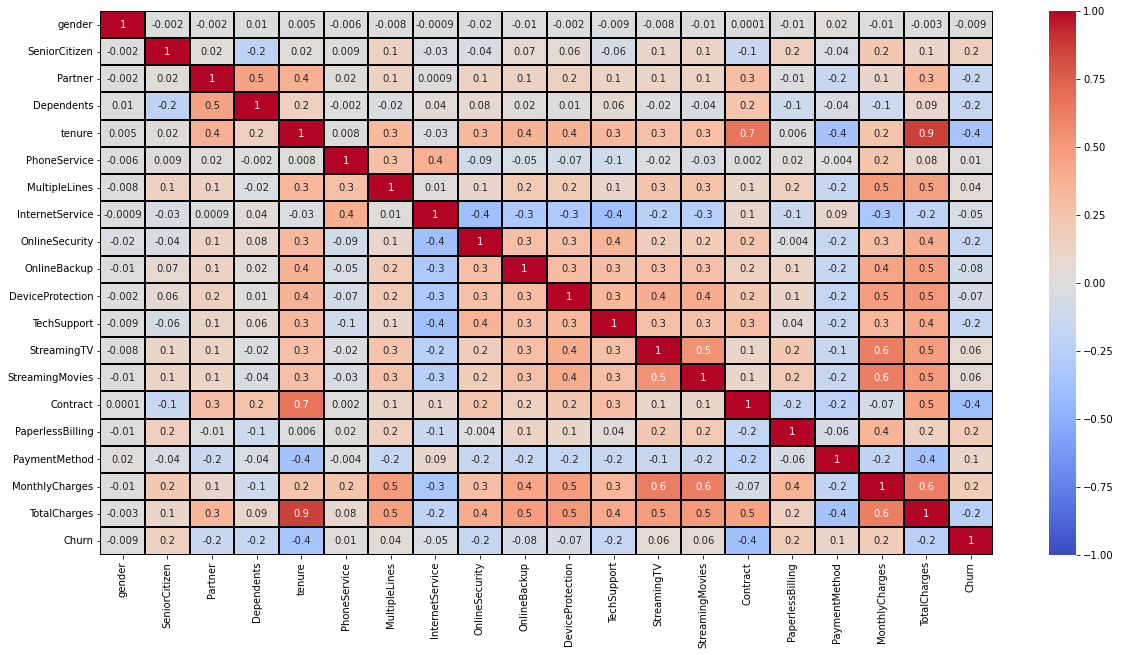

In [64]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

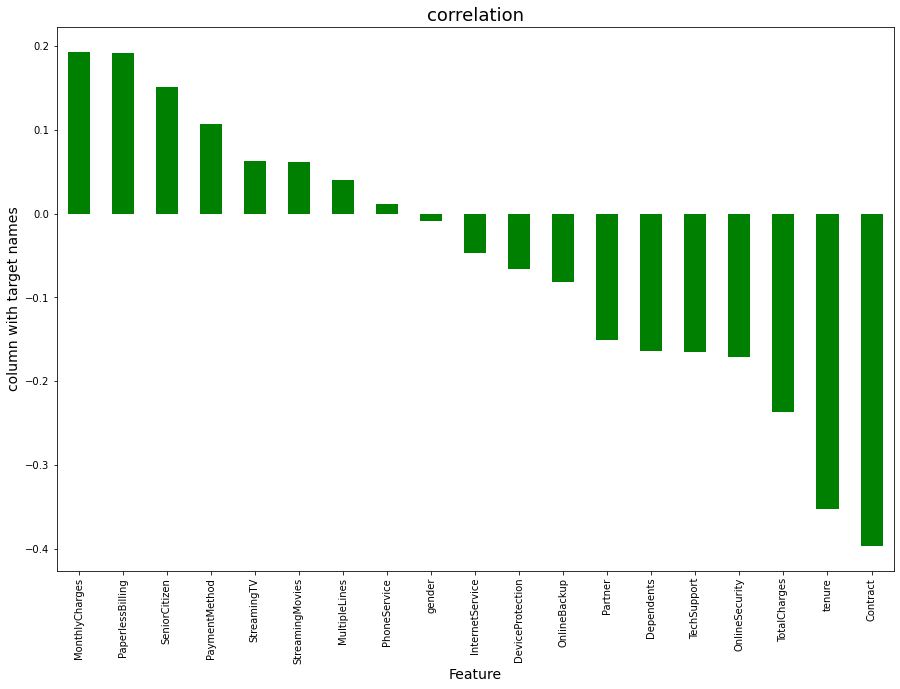

In [65]:
plt.figure(figsize=(15,10))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [66]:
#Separating features and label:
x = df.drop("Churn",axis=1)
y = df["Churn"]

In [67]:
#Scaling the data using standard scaler:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [68]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.854176,-1.183234,-0.633933,1.378241,-0.723968,-0.639439,-0.790132,-0.79607,-0.828207,0.829798,0.398558,-1.160323,-1.810588
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.854176,-1.183234,1.577454,-0.725563,1.381277,-0.639439,-0.790132,-0.79607,0.371271,-1.205113,1.334863,-0.259629,0.253313
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-1.183234,1.577454,1.378241,-0.723968,-0.639439,-0.790132,-0.79607,-0.828207,0.829798,1.334863,-0.362660,-1.387269
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-0.854176,-1.183234,1.577454,-0.725563,1.381277,1.563872,-0.790132,-0.79607,0.371271,-1.205113,-1.474052,-0.746535,0.232253
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,0.172250,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.79607,-0.828207,0.829798,0.398558,0.197365,-1.250118


In [69]:
#Checking multicolinearity using VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.001700,gender
1,1.149699,SeniorCitizen
2,1.463080,Partner
3,1.384360,Dependents
4,10.690330,tenure
5,1.712289,PhoneService
6,1.546815,MultipleLines
7,1.909515,InternetService
8,1.471226,OnlineSecurity
9,1.473860,OnlineBackup


In [70]:
#Droping highly VIF columns
X = X.drop(["TotalCharges"],axis=1)
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.001700,gender
1,1.149607,SeniorCitizen
2,1.460871,Partner
3,1.382066,Dependents
4,2.754518,tenure
5,1.712012,PhoneService
6,1.538487,MultipleLines
7,1.897435,InternetService
8,1.464039,OnlineSecurity
9,1.469031,OnlineBackup


In [71]:
#Balancing the target variable using oversampling:
#Checking the value count of target column
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

In [72]:
# Checking the value counts again
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

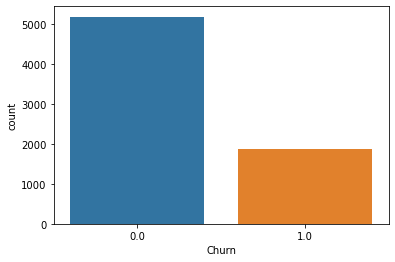

In [73]:
# Visualizing the target data after oversampling
sns.countplot(y)

In [74]:
#Finding Best Random State and Accuracy:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8116422148603881  on Random_state  98


In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

In [76]:
#Classification Algorithms:
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

In [77]:
#RandomForestClassifier:

RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
predrf=RFC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predrf))
print('Confusion Matrix:',confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

Accuracy Score: 0.8097491717936584
Confusion Matrix: [[1448  147]
 [ 255  263]]
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      1595
         1.0       0.64      0.51      0.57       518

    accuracy                           0.81      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.80      0.81      0.80      2113



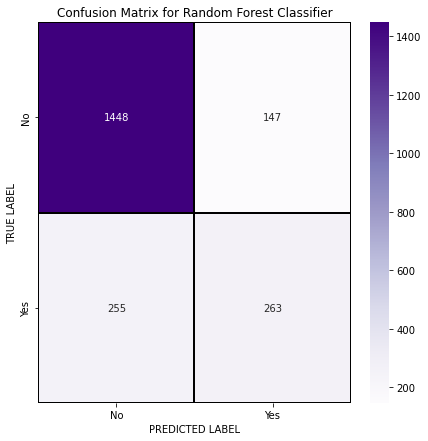

In [78]:
cm = confusion_matrix(y_test, predrf)

x_axis_labels = ["No","Yes"]
y_axis_labels = ["No","Yes"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()